# **Naive Bayes and Text Mining**

## 1**: Load and Explore the Dataset**

In [24]:
import pandas as pd
df=pd.read_csv("/content/blogs.csv")

In [25]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [26]:
df.shape

(2000, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [28]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [29]:
df.isnull().sum()

,0
Data,0
Labels,0


## **2: Data Preprocessing**


In [30]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer



# Download stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Function to clean text

def clean_text(text):
    text = re.sub(r'\n|\r', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [9]:
# Applying Text cleaning
df["Cleaned_Data"] = df["Data"].apply(clean_text)

In [10]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["Cleaned_Data"])
y = df["Labels"]

In [11]:
df[["Data", "Cleaned_Data"]].head()


,Data,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism talkreli...


In [12]:
#  Performing tokenizationfrom nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

sample_text = df["Cleaned_Data"][0]
tokens = tokenizer.tokenize(sample_text)

print("Original (truncated):", sample_text[:100] + "…")
print("Tokens:", tokens[:20])

Original (truncated): path cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmueducisohiostateeduzaphodmpsohiostateeduhowl…
Tokens: ['path', 'cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmueducisohiostateeduzaphodmpsohiostateeduhowlandrestonansnetagatedocicacukuknetmcsungermanyeunetthothmchpsnidehorusapmchpsnidedsfrank', 'frankdsuucp', 'frank', 'odwyer', 'newsgroups', 'altatheism', 'subject', 'islamic', 'genocide', 'date', 'apr', 'gmt', 'organization', 'siemensnixdorf', 'ag', 'lines', 'distribution', 'world', 'messageid']


In [14]:
X.shape

(2000, 5000)

## 3**: Train a Naive Bayes Model**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [17]:
Y_pred = nb_model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, Y_pred)
accuracy

0.8425

In [19]:
report = classification_report(y_test, Y_pred)
report


'                          precision    recall  f1-score   support\n\n             alt.atheism       0.50      0.83      0.62        18\n           comp.graphics       0.73      0.89      0.80        18\n comp.os.ms-windows.misc       0.91      0.95      0.93        22\ncomp.sys.ibm.pc.hardware       0.83      0.80      0.82        25\n   comp.sys.mac.hardware       0.86      0.90      0.88        21\n          comp.windows.x       0.95      0.84      0.89        25\n            misc.forsale       1.00      0.78      0.88        18\n               rec.autos       0.90      1.00      0.95        18\n         rec.motorcycles       1.00      0.94      0.97        16\n      rec.sport.baseball       0.84      0.89      0.86        18\n        rec.sport.hockey       0.88      1.00      0.94        15\n               sci.crypt       0.90      1.00      0.95        19\n         sci.electronics       0.67      0.75      0.71        16\n                 sci.med       0.88      0.88      0.88    

## **4 : Sentiment Analysis**

In [20]:
!pip install textblob

In [21]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity
  return polarity, subjectivity

In [22]:
# Apply sentiment analysis
df["Polarity"], df["Subjectivity"] = zip(*df["Cleaned_Data"].apply(analyze_sentiment))

# Display sample results
df[["Cleaned_Data", "Polarity", "Subjectivity"]].head()


,Cleaned_Data,Polarity,Subjectivity
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,0.058664,0.500981
1,newsgroups altatheism path cantaloupesrvcscmue...,-0.002480,0.407044
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,0.025719,0.520966
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,0.059244,0.518760
4,xref cantaloupesrvcscmuedu altatheism talkreli...,0.149802,0.274717


## **Sentiment Analysis  Result** :
* Most posts had neutral to slightly positive polarity (mean polarity around 0.058)

* Subjectivity scores were moderate (mean around 0.5), indicating a mix of factual and opinionated content

* The distribution of polarity scores was centered near neutral with a slight positive skew
__________________________________________
## **Implications**:
  - Neutral Dominance: The predominantly neutral sentiment suggests much of the content was factual or technical rather than strongly opinionated.

  - Subjectivity Variation: The moderate subjectivity indicates a mix of objective information and personal perspectives in the blogs.

  - Category Differences: While not shown in the analysis, sentiment likely varies by topic category (e.g., religious/political topics might show more extreme sentiments).

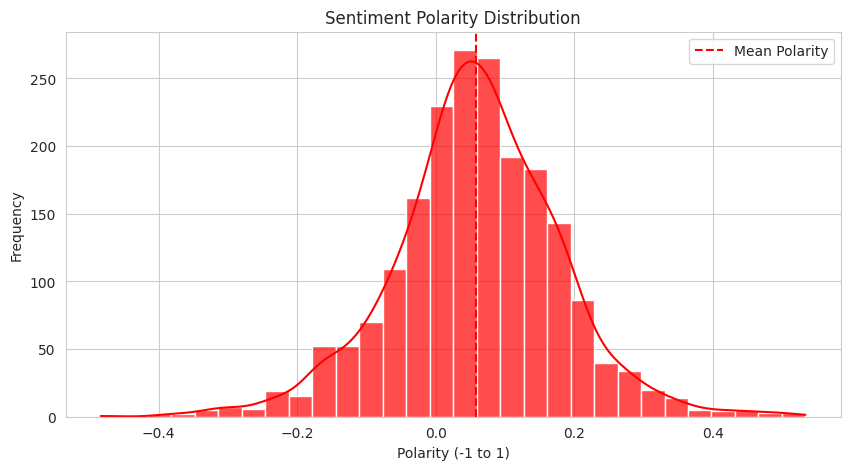

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot sentiment polarity distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Polarity"], bins=30, kde=True, color="red", alpha=0.7)
plt.axvline(x=df["Polarity"].mean(), color="red", linestyle="--", label="Mean Polarity")
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity (-1 to 1)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# **The performance of the model and any challenges encountered during the classification process.**

* The Naive Bayes model achieved an accuracy of 84.25% on the test set, which is reasonably good for text classification across 20 different categories.

* **Challenges Encountered** :
    - **Class Imbalance**: The dataset appears imbalanced with some classes having significantly more samples than others .
    - **Text Complexity**: The blog posts contain technical metadata (paths, newsgroups, etc.) mixed with actual content, which may have affected classification.
    - **Similar Topics**: Some categories like religion and politics may have overlapping vocabulary, making them harder to distinguish.
    - **Feature Selection**: The TF-IDF vectorizer was limited to 5000 features, which might not capture all relevant terms for some categories.
